In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [207]:
app = pd.read_csv("C:/Users/Vivek negi/OneDrive/Desktop/archive/googleplaystore.csv")
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [208]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [209]:
app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [210]:
app.dropna(inplace=True)

In [211]:
app.shape

(9360, 13)

In [212]:
app['Reviews'] = app['Reviews'].astype(int)

In [213]:
def mb2kb(x):
    if x.endswith('M'):
        return float(x[:-1])*1000
    elif x.endswith('k'):
        return float(x[:-1])
    else:
        return x
app['Size']= app['Size'].apply(lambda x : mb2kb(x))
app['Size'].replace(['Varies with device'],'Nan',inplace=True)
app['Size'] = app['Size'].astype(float)
app['Size'].fillna(app['Size'].mean(),inplace=True)

In [214]:
app.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [215]:
app['Installs'] = app['Installs'].apply(lambda x : x.replace(",",''))
app['Installs'] = app['Installs'].apply(lambda x : x.replace("+",''))
app['Installs'] = app['Installs'].astype(int)

In [216]:
app['Price'] = app['Price'].apply(lambda x : x.replace("$",''))
app['Price'] = app['Price'].astype(float)

In [217]:
app.drop(['Type','App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

<AxesSubplot: >

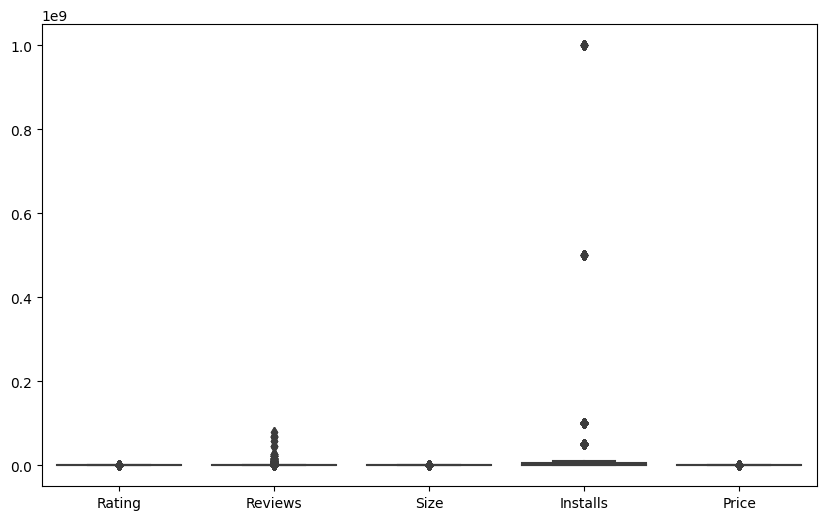

In [218]:
plt.figure(figsize=(10,6))
sns.boxplot(data=app)

Text(0.5, 0, 'Size in KB')

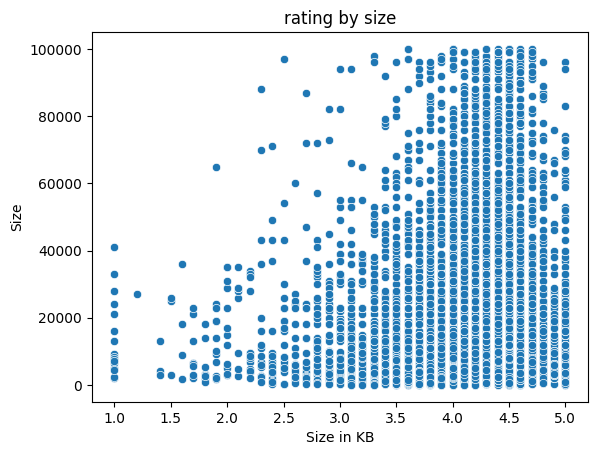

In [219]:
a=sns.scatterplot(data=app,x='Rating',y='Size')
a.set_title('rating by size')
a.set_xlabel('Size in KB')

Text(0.5, 1.0, 'Rating by Price')

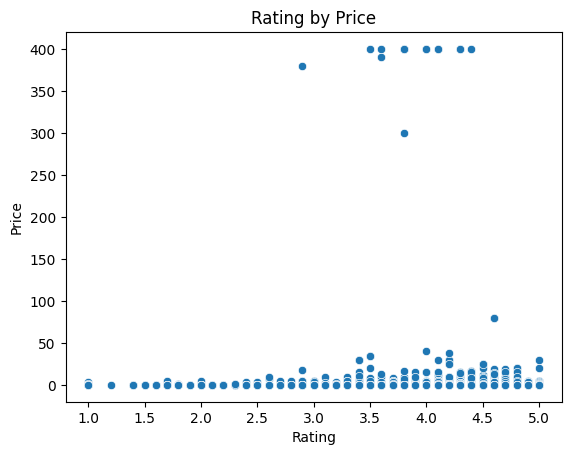

In [220]:
a = sns.scatterplot(data=app,x='Rating',y='Price')
a.set_title('Rating by Price')

Text(0.5, 1.0, 'Rating')

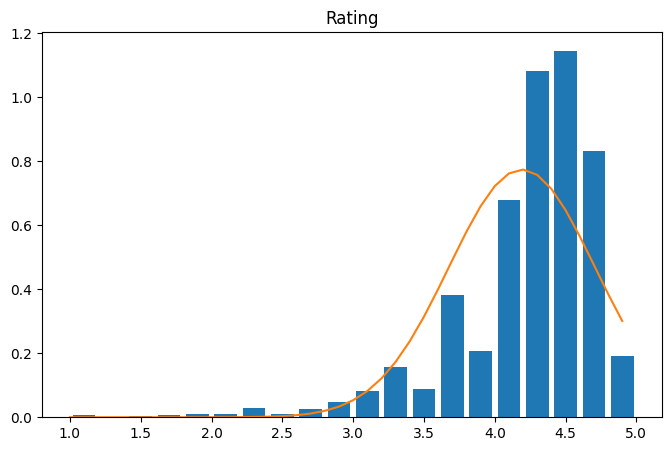

In [221]:
from scipy.stats import norm
plt.subplots(figsize = (8,5))
plt.hist(app['Rating'], bins=20, rwidth=0.8, density=True)
rng = np.arange(app['Rating'].min(),app['Rating'].max(),0.1)
plt.plot(rng, norm.pdf(rng,app['Rating'].mean(),app['Rating'].std()))
plt.title('Rating')

In [222]:
cl = ['Rating', 'Reviews', 'Size', 'Installs', 'Price',]
for i in cl:
    uppr = app[i].mean() + 3*app[i].std()
    lower = app[i].mean() - 3*app[i].std()
    df = app[(app[i]<uppr)&(app[i]>lower)]

In [223]:
df

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.000000,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.000000,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.000000,5000000,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.000000,100000,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2600.000000,500,0.0,Everyone,Education
10836,FAMILY,4.5,38,53000.000000,5000,0.0,Everyone,Education
10837,FAMILY,5.0,4,3600.000000,100,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,114,22970.456105,1000,0.0,Mature 17+,Books & Reference


In [224]:
col = ['Category','Content Rating','Genres']
df = pd.get_dummies(df,columns=col,drop_first=True)

In [225]:
df.head(2)

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,19000.0,10000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
x = df.drop(['Rating'],axis=1)
y = df['Rating']

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [228]:
x_train.shape,x_test.shape

((6540, 155), (2803, 155))

In [229]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [230]:
r2 = r2_score(y_test,y_pred).round(decimals=2)
print(f'\nR2: { r2}')

print(f'\nMean Squared Error: {mean_squared_error(y_test, y_pred)}')

print("\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)).round(decimals=2))


R2: 0.02

Mean Squared Error: 0.2502232600367895

Root Mean Squared Error:  0.5


In [231]:
pd.DataFrame({'actual': y_test, 'predict': y_pred,'diff':(y_test - y_pred)})

,actual,predict,diff
10092,4.7,4.004989,0.695011
3339,4.1,4.034194,0.065806
2631,4.0,4.294095,-0.294095
9687,4.6,4.297038,0.302962
308,4.4,4.143950,0.256050
...,...,...,...
7683,3.9,4.132659,-0.232659
645,3.0,3.926375,-0.926375
5647,3.8,4.218345,-0.418345
2141,4.7,4.273105,0.426895
